##  Pre-processing and Training Data Development

In [1]:
import pandas as pd
import numpy as np

import gensim
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import TreebankWordTokenizer

from gensim.models.tfidfmodel import TfidfModel

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/data_cleaned_3.csv')

pd.set_option('display.max_colwidth',None)
data.head()

,job_title,location,connection,job_title_nostop,location_cleaned,combined
0,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"houston, texas",85.0,2019 ct bauer college business graduate magna cum laude aspiring human resources professional,houston texas,2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas
1,Native English Teacher at EPIK (English Program in Korea),"canada, canada",500.0,native english teacher epik english program korea,canada canada,native english teacher epik english program korea canada canada
2,Aspiring Human Resources Professional,"raleigh durham, north carolina",44.0,aspiring human resources professional,raleigh durham north carolina,aspiring human resources professional raleigh durham north carolina
3,People Development Coordinator at Ryan,"denton, texas",500.0,people development coordinator ryan,denton texas,people development coordinator ryan denton texas
4,Aspiring Human Resources Specialist,"new york, new york",1.0,aspiring human resources specialist,new york new york,aspiring human resources specialist new york new york


### Feature Engineering

Displaying the combined column which contains the text combined with both the job title and location data

In [3]:
data['combined'].value_counts()

2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas                          1
liberal arts major aspiring human resources analyst baton rouge louisiana                                                            1
senior human resources business partner heil environmental chattanooga tennessee                                                     1
aspiring human resources professional energetic teamfocused leader austin texas                                                      1
hr manager endemol shine north america los angeles california                                                                        1
human resources professional world leader gis software highland california                                                           1
rrp brand portfolio executive jti japan tobacco international philadelphia pennsylvania                                              1
information systems specialist programmer love data org

In [4]:
# variable to train
X_train = data['combined'].values

In [5]:
print(X_train)

['2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas'
 'native english teacher epik english program korea canada canada'
 'aspiring human resources professional raleigh durham north carolina'
 'people development coordinator ryan denton texas'
 'aspiring human resources specialist new york new york'
 'student humber college aspiring human resources generalist canada canada'
 'hr senior specialist san francisco california'
 'seeking human resources hris generalist positions philadelphia pennsylvania'
 'student chapman university lake forest california'
 'svp chro marketing communications csr officer engie houston woodlands energy gphr sphr houston texas'
 'human resources coordinator intercontinental buckhead atlanta atlanta georgia'
 'aspiring human resources management student seeking internship houston texas'
 'seeking human resources opportunities chicago illinois'
 'experienced retail manager aspiring human resources professi

### Generate Document Vectors

#### Usuage of Gensim
Gensim is an open-source NLP library for building document or word vectors.</br>
With these vectors, we can then see relationships among the words or documents based on how near or far they are and also what similar comparisons we find.</br>
Gensim allows to build corpora and dictionaries using simple classes and functions.

### Tokenize words

In [6]:
tokenized_docs = [TreebankWordTokenizer().tokenize(doc) for doc in X_train]

In [7]:
print(tokenized_docs)

[['2019', 'ct', 'bauer', 'college', 'business', 'graduate', 'magna', 'cum', 'laude', 'aspiring', 'human', 'resources', 'professional', 'houston', 'texas'], ['native', 'english', 'teacher', 'epik', 'english', 'program', 'korea', 'canada', 'canada'], ['aspiring', 'human', 'resources', 'professional', 'raleigh', 'durham', 'north', 'carolina'], ['people', 'development', 'coordinator', 'ryan', 'denton', 'texas'], ['aspiring', 'human', 'resources', 'specialist', 'new', 'york', 'new', 'york'], ['student', 'humber', 'college', 'aspiring', 'human', 'resources', 'generalist', 'canada', 'canada'], ['hr', 'senior', 'specialist', 'san', 'francisco', 'california'], ['seeking', 'human', 'resources', 'hris', 'generalist', 'positions', 'philadelphia', 'pennsylvania'], ['student', 'chapman', 'university', 'lake', 'forest', 'california'], ['svp', 'chro', 'marketing', 'communications', 'csr', 'officer', 'engie', 'houston', 'woodlands', 'energy', 'gphr', 'sphr', 'houston', 'texas'], ['human', 'resources', 

### Create bigram

Topic models make more sense when 'New' and 'York' are treated as 'New York' - we can do this by creating a bigram model and modifying our corpus accordingly. </br>
Scoring for bigram phrases, the default is the PMI-like scoring as described in Mikolov, et. al: “Distributed Representations of Words and Phrases and their Compositionality”.

In [8]:
from gensim.models.phrases import Phrases

In [9]:
#Build a Bigram
bigram = Phrases(tokenized_docs, min_count=1, threshold=1) #train model
tokenized_docs_bigram= [bigram[line] for line in tokenized_docs]

In [10]:
for phrase, score in bigram.find_phrases(tokenized_docs).items():
    print(phrase, score)

aspiring_human 15.31720430107527
resources_professional 12.532258064516128
houston_texas 34.53333333333333
canada_canada 32.375
raleigh_durham 115.1111111111111
north_carolina 51.800000000000004
resources_specialist 4.17741935483871
new_york 56.65625
resources_generalist 8.35483870967742
seeking_human 5.56989247311828
philadelphia_pennsylvania 129.5
human_resources 16.170655567117585
atlanta_georgia 86.33333333333333
resources_management 2.78494623655914
seeking_internship 28.777777777777775
chicago_illinois 86.33333333333333
retail_manager 37.0
austin_texas 25.900000000000002
director_human 5.56989247311828
north_america 51.800000000000004
manager_seeking 8.222222222222221
business_management 17.266666666666666
major_aspiring 14.388888888888888
resources_manager 4.774193548387097
information_systems 129.5
los_angeles 129.5
management_major 28.777777777777775
long_beach 64.75
resources_position 5.56989247311828


In [11]:
tokenized_docs_bigram

[['2019',
  'ct',
  'bauer',
  'college',
  'business',
  'graduate',
  'magna',
  'cum',
  'laude',
  'aspiring_human',
  'resources_professional',
  'houston_texas'],
 ['native',
  'english',
  'teacher',
  'epik',
  'english',
  'program',
  'korea',
  'canada_canada'],
 ['aspiring_human',
  'resources_professional',
  'raleigh_durham',
  'north_carolina'],
 ['people', 'development', 'coordinator', 'ryan', 'denton', 'texas'],
 ['aspiring_human', 'resources_specialist', 'new_york', 'new_york'],
 ['student',
  'humber',
  'college',
  'aspiring_human',
  'resources_generalist',
  'canada_canada'],
 ['hr', 'senior', 'specialist', 'san', 'francisco', 'california'],
 ['seeking_human',
  'resources',
  'hris',
  'generalist',
  'positions',
  'philadelphia_pennsylvania'],
 ['student', 'chapman', 'university', 'lake', 'forest', 'california'],
 ['svp',
  'chro',
  'marketing',
  'communications',
  'csr',
  'officer',
  'engie',
  'houston',
  'woodlands',
  'energy',
  'gphr',
  'sphr',
  

### Create Dictionary needed for Topic Modeling

In [12]:
# create a dictionary from the job_title and location containing the number of times a word appears in the training set.
#This creates a mapping for Ids for each token
dictionary = Dictionary(tokenized_docs_bigram) 

In [13]:
print(dictionary)

Dictionary(234 unique tokens: ['2019', 'aspiring_human', 'bauer', 'business', 'college']...)


In [14]:
print(dictionary.token2id)

{'2019': 0, 'aspiring_human': 1, 'bauer': 2, 'business': 3, 'college': 4, 'ct': 5, 'cum': 6, 'graduate': 7, 'houston_texas': 8, 'laude': 9, 'magna': 10, 'resources_professional': 11, 'canada_canada': 12, 'english': 13, 'epik': 14, 'korea': 15, 'native': 16, 'program': 17, 'teacher': 18, 'north_carolina': 19, 'raleigh_durham': 20, 'coordinator': 21, 'denton': 22, 'development': 23, 'people': 24, 'ryan': 25, 'texas': 26, 'new_york': 27, 'resources_specialist': 28, 'humber': 29, 'resources_generalist': 30, 'student': 31, 'california': 32, 'francisco': 33, 'hr': 34, 'san': 35, 'senior': 36, 'specialist': 37, 'generalist': 38, 'hris': 39, 'philadelphia_pennsylvania': 40, 'positions': 41, 'resources': 42, 'seeking_human': 43, 'chapman': 44, 'forest': 45, 'lake': 46, 'university': 47, 'chro': 48, 'communications': 49, 'csr': 50, 'energy': 51, 'engie': 52, 'gphr': 53, 'houston': 54, 'marketing': 55, 'officer': 56, 'sphr': 57, 'svp': 58, 'woodlands': 59, 'atlanta': 60, 'atlanta_georgia': 61, 'b

### Create a Bag of Words Corpus

Bag of words corpus in the Gensim library are based on dictionaries and contain the ID of each word along with the frequency of occurrence of the word.

In [15]:
# Create a gensim corpus
# This is a bag of words for the text in the format (token_id, token_count) 2 tuples

bow_corpus = [dictionary.doc2bow(token) for token in tokenized_docs_bigram]
print(bow_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(1, 1), (11, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(1, 1), (27, 2), (28, 1)], [(1, 1), (4, 1), (12, 1), (29, 1), (30, 1), (31, 1)], [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)], [(31, 1), (32, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(8, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(21, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(1, 1), (8, 1), (31, 1), (65, 1), (66, 1)], [(42, 1), (43, 1), (67, 1), (68, 1)], [(1, 1), (11, 1), (69, 1), (70, 1), (71, 1)], [(63, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(27, 2), (37, 1), (63, 1), (77, 1)], [(42, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)], [(63, 1), (85, 1), (

What do these tuples mean? Let’s convert them into human readable format to understand:

In [16]:
[[(dictionary[i], freq) for i, freq in doc] for doc in bow_corpus[:3]]

[[('2019', 1),
  ('aspiring_human', 1),
  ('bauer', 1),
  ('business', 1),
  ('college', 1),
  ('ct', 1),
  ('cum', 1),
  ('graduate', 1),
  ('houston_texas', 1),
  ('laude', 1),
  ('magna', 1),
  ('resources_professional', 1)],
 [('canada_canada', 1),
  ('english', 2),
  ('epik', 1),
  ('korea', 1),
  ('native', 1),
  ('program', 1),
  ('teacher', 1)],
 [('aspiring_human', 1),
  ('resources_professional', 1),
  ('north_carolina', 1),
  ('raleigh_durham', 1)]]

In [17]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(bow_corpus))

Number of unique tokens: 234
Number of documents: 49


### Create a TF-IDF matrix with Gensim

The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.

During this transformation, it will take a vector and return another vector of the same dimensionality, except that features which were rare in the training corpus will have their value increased.

In [18]:
tfidf = TfidfModel(bow_corpus) # step 1 -- initialize a model

#tfidf is treated as a read-only object that can be used to convert any vector from the old 
#representation (bag-of-words integer counts) to the new representation 

corpus_tfidf = tfidf[bow_corpus] # step 2 Apply transformation to the entire corpus 

In [19]:
for doc, as_text in zip(corpus_tfidf, X_train):
    print(doc, as_text, end='\n\n') 

[(0, 0.33249872454322044), (1, 0.13577674153068667), (2, 0.33249872454322044), (3, 0.2386384851773402), (4, 0.2732795068499476), (5, 0.33249872454322044), (6, 0.33249872454322044), (7, 0.33249872454322044), (8, 0.1949959592239595), (9, 0.33249872454322044), (10, 0.33249872454322044), (11, 0.1949959592239595)] 2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas

[(12, 0.2642287470777187), (13, 0.6429733601593075), (14, 0.32148668007965375), (15, 0.32148668007965375), (16, 0.32148668007965375), (17, 0.32148668007965375), (18, 0.32148668007965375)] native english teacher epik english program korea canada canada

[(1, 0.32896328403055086), (11, 0.4724410852392083), (19, 0.5781792882566074), (20, 0.5781792882566074)] aspiring human resources professional raleigh durham north carolina

[(21, 0.3607507629467542), (22, 0.4389248573390143), (23, 0.4389248573390143), (24, 0.4389248573390143), (25, 0.4389248573390143), (26, 0.315021849199446

In [20]:
#print the second document 
# returns a list of tuples, where the first entry is the token ID and the second entry is the tf-idf weighting
corpus_tfidf[1]

[(12, 0.2642287470777187),
 (13, 0.6429733601593075),
 (14, 0.32148668007965375),
 (15, 0.32148668007965375),
 (16, 0.32148668007965375),
 (17, 0.32148668007965375),
 (18, 0.32148668007965375)]

#### The most relevant term in the second document is then term number 13

In [21]:
#looking up the word in the dictionary
dictionary[13]

'english'

'english' is the most relevant term in that document

#### similarity queries

To query the similarity of a query document against every other document in the corpus
And to see the top five terms for a particular document:

In [22]:
from gensim.similarities import SparseMatrixSimilarity

In [23]:
index = SparseMatrixSimilarity(corpus_tfidf, num_features = len(dictionary))

In [24]:
sims = index[corpus_tfidf[1]]
print(list(enumerate(sims)))

[(0, 0.0), (1, 1.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.11127411), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0)]


Here the 2nd job title is closest to the 6th title

In [25]:
print(data['combined'].iloc[1])
print(data['combined'].iloc[5])

native english teacher epik english program korea canada canada
student humber college aspiring human resources generalist canada canada


### Check for unseen data

In [26]:
query_doc = "aspiring human resources".split()
query_bow = dictionary.doc2bow(query_doc)

In [27]:
sims1 = index[tfidf[query_bow]]

In [28]:
result = list(enumerate(sims1))
[x for x in result if x[1] > 0]

[(7, 0.2951146),
 (12, 0.4037879),
 (16, 0.22665311),
 (22, 0.21707174),
 (35, 0.36837038)]

In [29]:
#print the documents that are closest to the unseen data
print(data['combined'].iloc[12])
print(data['combined'].iloc[35])
print(data['combined'].iloc[7])
print(data['combined'].iloc[16])
print(data['combined'].iloc[22])

seeking human resources opportunities chicago illinois
director human resources ey atlanta georgia
seeking human resources hris generalist positions philadelphia pennsylvania
director human resources north america groupe beneteau grand rapids michigan
nortia staffing seeking human resources payroll administrative professionals  san jose california


In [30]:
# Saving corpus
corpus_tfidf.save('x.corpus_tfidf')

### Topic Modelling

Topic Modelling refers to the probabilistic modelling of text documents as topics.
Topic modeling is family of techniques that can be used to describe and summarize the documents in a corpus according to a set of latent "topics".

In [31]:
from gensim.models import LdaModel, LsiModel

#### LSI - Latent Semantic Indexing

This transforms documents from either bag-of-words or (preferrably) TfIdf-weighted space into a latent space of a lower dimensionality.

In [32]:
lsimodel = LsiModel(corpus_tfidf, num_topics=10, id2word=dictionary, chunksize=49)

#Get the most significant topics
lsimodel.show_topics(num_topics=-1, num_words=10, formatted=True) 

[(0,
  '0.470*"new_york" + 0.357*"aspiring_human" + 0.313*"houston_texas" + 0.249*"student" + 0.238*"raleigh_durham" + 0.238*"north_carolina" + 0.234*"resources_professional" + 0.226*"seeking_internship" + 0.169*"human_resources" + 0.134*"resources_manager"'),
 (1,
  '0.682*"new_york" + -0.330*"houston_texas" + -0.295*"student" + -0.214*"seeking_internship" + 0.173*"resources_specialist" + 0.168*"luxottica" + 0.145*"specialist" + -0.136*"resources_management" + -0.127*"raleigh_durham" + -0.127*"north_carolina"'),
 (2,
  '-0.446*"raleigh_durham" + -0.446*"north_carolina" + 0.327*"houston_texas" + -0.325*"generalist" + 0.305*"student" + -0.213*"loparex" + 0.200*"seeking_internship" + -0.173*"inc" + -0.173*"scottmadden" + -0.152*"resources_professional"'),
 (3,
  '0.400*"resources" + 0.333*"seeking_human" + 0.238*"california" + 0.232*"chicago_illinois" + 0.221*"opportunities" + 0.185*"director_human" + 0.162*"san" + 0.153*"atlanta_georgia" + 0.149*"ey" + 0.139*"hr"'),
 (4,
  '0.274*"resou

#### Determine the optimum number of topics for LSI

In [33]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, start, stop, step):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSI model
        model_lsi = LsiModel(corpus, num_topics=num_topics, id2word = dictionary, chunksize=49)  # train model
        model_list.append(model_lsi)
        coherencemodel = CoherenceModel(model=model_lsi, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [34]:
import matplotlib.pyplot as plt

def plot_graph(start, stop, step):
    model_list, coherence_values = compute_coherence_values(dictionary, corpus_tfidf, tokenized_docs_bigram, start, stop, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.xticks(np.arange(start, stop, step))
    plt.ylabel("Coherence score")
    #plt.legend(("coherence_values"), loc='best')
    plt.show()

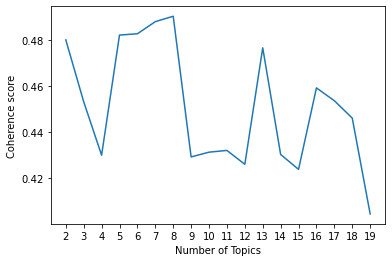

In [35]:
start,stop,step=2,20,1
plot_graph(start,stop,step)

This graph shows that the optimum number of topics for LSI model is 9

#### Creating LSI model with optimum topics

In [36]:
lsimodel_optimum = LsiModel(corpus_tfidf, num_topics=9, id2word=dictionary, chunksize=49)

#### Latent Dirichlet Allocation (LDA)

In [37]:
# Set training parameters.
num_topics = 10
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

ldamodel = LdaModel(corpus_tfidf, 
               id2word=dictionary,
               num_topics=num_topics, 
               passes = passes, 
               alpha='auto',
               eta='auto',
               iterations=iterations,
               random_state=1)

# each element of the list is a tuple 
# containing the topic and word / probability list
#topics = ldamodel.show_topics(num_words = 10, formatted = False)num_topics=5
ldamodel.show_topics(num_topics=-1, num_words = 10, formatted = True)

[(0,
  '0.024*"professional" + 0.020*"management" + 0.018*"jackson" + 0.018*"recruiting" + 0.018*"mississippi" + 0.017*"highland" + 0.017*"software" + 0.017*"world" + 0.017*"gis" + 0.016*"staffing"'),
 (1,
  '0.031*"new_york" + 0.025*"indiana" + 0.025*"resources_specialist" + 0.014*"paint" + 0.014*"kokomo" + 0.014*"hardware" + 0.014*"delphi" + 0.014*"lafayette" + 0.012*"retail_manager" + 0.012*"business_management"'),
 (2,
  '0.022*"north_carolina" + 0.022*"raleigh_durham" + 0.021*"new_york" + 0.019*"resources_professional" + 0.018*"business" + 0.018*"hr" + 0.017*"senior" + 0.015*"north_america" + 0.015*"boston" + 0.014*"loparex"'),
 (3,
  '0.035*"student" + 0.028*"houston_texas" + 0.020*"forest" + 0.020*"chapman" + 0.020*"lake" + 0.015*"rrp" + 0.015*"portfolio" + 0.015*"brand" + 0.015*"tobacco" + 0.015*"international"'),
 (4,
  '0.029*"seeking_internship" + 0.021*"houston_texas" + 0.021*"human_resources" + 0.019*"new_york" + 0.018*"specialist" + 0.017*"resources_management" + 0.016*"r

show_topics() from the model, will output the most probable words that appear in each topic. For the gensim library, the default printing behavior is to print a linear combination of the top words sorted in decreasing order of the probability of the word appearing in that topic. Thus words that appear towards the left are the ones that are more indicative of the topic.

In [38]:
print(ldamodel.get_term_topics('human_resources'))

[(4, 0.010774954)]


The get_document_topics method outputs the topic distribution of the document. Apart from this, it also let us know the topic distribution for each word in the document.

#### Determine the optimum number of topics for LDA

Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference,

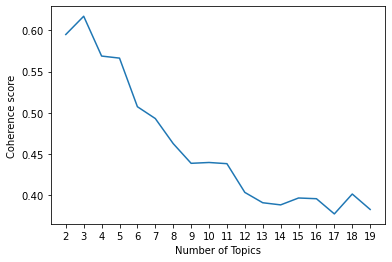

In [39]:
def compute_coherence_values_lda(dictionary, corpus, texts, start, stop, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model_lda=model_lda=LdaModel(corpus=corpus, 
                           id2word=dictionary, 
                           num_topics=num_topics, 
                           passes = passes, 
                           alpha='auto',
                           eta='auto',
                           iterations=iterations,
                           random_state=1)
        model_list.append(model_lda)
        coherencemodel_lda = CoherenceModel(model=model_lda, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel_lda.get_coherence())

    return model_list, coherence_values

#Create a model list and plot Coherence score against a number of topics

start=2; stop = 20; step=1;
model_list, coherence_values = compute_coherence_values_lda(dictionary, corpus_tfidf, tokenized_docs_bigram, start, stop, step)
# Show graph

x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xticks(np.arange(start, stop, step))
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.show()

The last step is to find the optimal number of topics.We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value. Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

In [40]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.595
Num Topics = 3  has Coherence Value of 0.6171
Num Topics = 4  has Coherence Value of 0.5689
Num Topics = 5  has Coherence Value of 0.5664
Num Topics = 6  has Coherence Value of 0.5075
Num Topics = 7  has Coherence Value of 0.4931
Num Topics = 8  has Coherence Value of 0.4627
Num Topics = 9  has Coherence Value of 0.4388
Num Topics = 10  has Coherence Value of 0.4399
Num Topics = 11  has Coherence Value of 0.4384
Num Topics = 12  has Coherence Value of 0.4036
Num Topics = 13  has Coherence Value of 0.3911
Num Topics = 14  has Coherence Value of 0.3885
Num Topics = 15  has Coherence Value of 0.3968
Num Topics = 16  has Coherence Value of 0.3959
Num Topics = 17  has Coherence Value of 0.3775
Num Topics = 18  has Coherence Value of 0.4016
Num Topics = 19  has Coherence Value of 0.3829


In [41]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score \\
of {coherence_values[best_result_index]}''')

The 3 topics gives the highest coherence score \
of 0.6171343231168103


### Model Evaluation
#### Topic Coherence is a measure that is used to evaluate topic models.

After evaluating the coherence metrics LDA with 3 topics had a higher value than LSI with 9 topics


### Visualization with PyLDAvis

In [42]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [43]:
# Set training parameters.
num_topics = 6
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

ldamodel_final = LdaModel(corpus_tfidf, 
               id2word=dictionary,
               num_topics=num_topics, 
               passes = passes, 
               alpha='auto',
               eta='auto',
               iterations=iterations,
               random_state=1)

In [44]:
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel_final, corpus_tfidf, dictionary)

In [45]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.041429  0.035529       1        1  25.353435
3      0.058626  0.005724       2        1  20.291925
5     -0.017013 -0.056499       3        1  17.929657
1      0.005542  0.024668       4        1  16.387178
0     -0.013138 -0.005269       5        1  10.641137
4      0.007411 -0.004153       6        1   9.396668, topic_info=                       Term      Freq     Total Category  logprob  loglift
27                 new_york  1.000000  1.000000  Default  30.0000  30.0000
197              long_beach  0.000000  0.000000  Default  29.0000  29.0000
65     resources_management  0.000000  0.000000  Default  28.0000  28.0000
66       seeking_internship  0.000000  0.000000  Default  27.0000  27.0000
174        management_major  0.000000  0.000000  Default  26.0000  26.0000
..                      ...       ...       ...      ...      ...      ...
47               university  0.089321  0.785069   Topic6  -4.8539   0.1913
31                  student  0.117270  1.055908   Topic6  -4.5817   0.1671
11   resources_professional  0.083254  0.872325   Topic6  -4.9242   0.0155
109           professionals  0.038377  0.427132   Topic6  -5.6987  -0.0448
32               california  0.071423  0.931441   Topic6  -5.0775  -0.2033

[250 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
27        1  0.787985  new_york
27        4  0.787985  new_york
31        2  0.947052   student, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 6, 2, 1, 5])

In [46]:
pyLDAvis.save_html(lda_viz, 'lda.html')

#### Interpret pyLDAvis’s output

* A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.</br>
* Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.</br>

* Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.</br>
* Red bars give the estimated number of times a given term was generated by a given topic
* The word with the longest red bar is the word that is used the most by the texts belonging to that topic.

### Testing model on unseen data

#### Using LDA model

#### Print the topic associations with the documents for LDA

In [47]:
# printing the topic associations with the original documents for the LDA model
count = 0
for i in ldamodel_final[bow_corpus]:
    print('doc : ', count, i)
    count += 1

doc :  0 [(4, 0.96107537)]
doc :  1 [(1, 0.010442298), (2, 0.01421108), (3, 0.013043406), (5, 0.94676864)]
doc :  2 [(0, 0.015233415), (1, 0.89833456), (2, 0.026714917), (3, 0.024514012), (4, 0.013951466), (5, 0.021251641)]
doc :  3 [(0, 0.010583503), (1, 0.013629727), (2, 0.9343078), (3, 0.0170208), (5, 0.014765316)]
doc :  4 [(0, 0.015233246), (1, 0.8983479), (2, 0.026711727), (3, 0.024504429), (4, 0.013951332), (5, 0.021251427)]
doc :  5 [(0, 0.010583361), (1, 0.013629768), (2, 0.01854994), (3, 0.9327795), (5, 0.014764678)]
doc :  6 [(0, 0.010583389), (1, 0.013629843), (2, 0.018554263), (3, 0.017020859), (5, 0.93051887)]
doc :  7 [(0, 0.010583568), (1, 0.013629897), (2, 0.018577868), (3, 0.017023997), (5, 0.93049175)]
doc :  8 [(0, 0.01058351), (1, 0.013629743), (2, 0.018553864), (3, 0.93277115), (5, 0.014768903)]
doc :  9 [(1, 0.96585524)]
doc :  10 [(0, 0.010583427), (1, 0.013629947), (2, 0.0185621), (3, 0.017024888), (5, 0.9305068)]
doc :  11 [(0, 0.012489609), (1, 0.016085101), 

In [48]:
# creating a dataframe to store the associated topics for each document
def get_max(doc):
        idx,l = zip(*doc)
        return idx[np.argmax(l)]

data['doc_topic'] = [get_max(doc) for doc in ldamodel_final.get_document_topics(corpus_tfidf)]

In [49]:
df1 = data[['combined', 'doc_topic']]
df1.head(10)

,combined,doc_topic
0,2019 ct bauer college business graduate magna cum laude aspiring human resources professional houston texas,4
1,native english teacher epik english program korea canada canada,5
2,aspiring human resources professional raleigh durham north carolina,1
3,people development coordinator ryan denton texas,2
4,aspiring human resources specialist new york new york,1
5,student humber college aspiring human resources generalist canada canada,3
6,hr senior specialist san francisco california,5
7,seeking human resources hris generalist positions philadelphia pennsylvania,5
8,student chapman university lake forest california,3
9,svp chro marketing communications csr officer engie houston woodlands energy gphr sphr houston texas,1


#### Unseen Text - 1

In [50]:
test_doc = 'aspiring human resources'
bow_test_doc = dictionary.doc2bow(test_doc.split())

print(ldamodel_final.get_document_topics(bow_test_doc))

[(0, 0.68885577), (1, 0.05754202), (2, 0.07842874), (3, 0.07191027), (4, 0.04092138), (5, 0.062341847)]


The unseen text has a higher probability with topic 0

In [51]:
df1.loc[df1['doc_topic'] == 0]

,combined,doc_topic
16,director human resources north america groupe beneteau grand rapids michigan,0
18,human resources generalist scottmadden inc raleigh durham north carolina,0
22,nortia staffing seeking human resources payroll administrative professionals san jose california,0
34,human resources management major milpitas california,0
48,director administration excellence logging katy texas,0


The above list shows all the documents that are displayed for the unseen text

#### Unseen Text - 2

#### Similarity Queries and Unseen Data

In [52]:
from gensim import similarities
index = similarities.MatrixSimilarity(ldamodel_final[corpus_tfidf])  # transform corpus to LDA space and index it

In [53]:
doc = "Seeking english teacher"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lda = ldamodel_final[vec_bow]  # convert the query to LSI space
print(vec_lda)

[(0, 0.019522646), (1, 0.025141822), (2, 0.03422938), (3, 0.031397156), (4, 0.017879764), (5, 0.8718293)]


The unseen text has a higher probability with topic 5

In [54]:
df1.loc[df1['doc_topic'] == 5]

,combined,doc_topic
1,native english teacher epik english program korea canada canada,5
6,hr senior specialist san francisco california,5
7,seeking human resources hris generalist positions philadelphia pennsylvania,5
10,human resources coordinator intercontinental buckhead atlanta atlanta georgia,5
20,aspiring human resources manager seeking internship human resources houston texas,5
29,hr manager endemol shine north america los angeles california,5
36,undergraduate research assistant styczynski lab atlanta georgia,5
38,seeking employment opportunities within customer service patient care torrance california,5
47,always set success los angeles california,5


## Using Doc2Vec

Doc2Vec is a Model that represents each Document as a Vector. </br>

In Gensim, Paragraph Vector model is referred as Doc2Vec.</br>

Le and Mikolov in 2014 introduced the Doc2Vec algorithm <https://cs.stanford.edu/~quocle/paragraph_vector.pdf>, which usually outperforms such simple-averaging of Word2Vec vectors.</br>

There are two implementations:</br>

* Paragraph Vector - Distributed Memory (PV-DM)
* Paragraph Vector - Distributed Bag of Words (PV-DBOW)

PV-DM is analogous to Word2Vec CBOW. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a center word based an average of both context word-vectors and the full document's doc-vector.</br>

PV-DBOW is analogous to Word2Vec SG. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a target word just from the full document's doc-vector. (It is also common to combine this with skip-gram testing, using both the doc-vector and nearby word-vectors to predict a single target word, but only one at a time.)</br>

To train the model, need to associate a tag/number with each document of the training corpus.

In [55]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [56]:
tagged_data = [TaggedDocument(words=TreebankWordTokenizer().tokenize(d), tags=[i]) for i, d in enumerate(X_train)]

In [57]:
tagged_data[:10]

[TaggedDocument(words=['2019', 'ct', 'bauer', 'college', 'business', 'graduate', 'magna', 'cum', 'laude', 'aspiring', 'human', 'resources', 'professional', 'houston', 'texas'], tags=[0]),
 TaggedDocument(words=['native', 'english', 'teacher', 'epik', 'english', 'program', 'korea', 'canada', 'canada'], tags=[1]),
 TaggedDocument(words=['aspiring', 'human', 'resources', 'professional', 'raleigh', 'durham', 'north', 'carolina'], tags=[2]),
 TaggedDocument(words=['people', 'development', 'coordinator', 'ryan', 'denton', 'texas'], tags=[3]),
 TaggedDocument(words=['aspiring', 'human', 'resources', 'specialist', 'new', 'york', 'new', 'york'], tags=[4]),
 TaggedDocument(words=['student', 'humber', 'college', 'aspiring', 'human', 'resources', 'generalist', 'canada', 'canada'], tags=[5]),
 TaggedDocument(words=['hr', 'senior', 'specialist', 'san', 'francisco', 'california'], tags=[6]),
 TaggedDocument(words=['seeking', 'human', 'resources', 'hris', 'generalist', 'positions', 'philadelphia', 'pe

### Training the Model

Now, we'll instantiate a Doc2Vec model with a vector size with 50 dimensions and iterating over the training corpus 40 times. We set the minimum word count to 2 in order to discard words with very few occurrences. (Without a variety of representative examples, retaining such infrequent words can often make a model worse!) Typical iteration counts in the published Paragraph Vector paper <https://cs.stanford.edu/~quocle/paragraph_vector.pdf>__ results, using 10s-of-thousands to millions of docs, are 10-20. More iterations take more time and eventually reach a point of diminishing returns.

However, this is a very very small dataset (49 documents) with shortish documents (a few hundred words). Adding training passes can sometimes help with such small datasets.

In [58]:
#d2v_model = Doc2Vec(vector_size=50, min_count=1, epochs=20)
d2v_model = Doc2Vec(dm=1, vector_size=10, min_count=2, epochs=200)

#### Build a vocabulary

In [59]:
d2v_model.build_vocab(tagged_data)

Essentially, the vocabulary is a list (accessible via model.wv.index_to_key) of all of the unique words extracted from the training corpus. Additional attributes for each word are available using the model.wv.get_vecattr() method

In [60]:
print(f"Word 'english' appeared {d2v_model.wv.get_vecattr('english', 'count')} times in the training corpus.")

Word 'english' appeared 2 times in the training corpus.


#### Train the model 

Train the model on the corpus. If optimized Gensim (with BLAS library) is being used, this should take no more than 3 seconds. If the BLAS library is not being used, this should take no more than 2 minutes, so use optimized Gensim with BLAS 

In [61]:
d2v_model.train(tagged_data, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

In [62]:
#save the model
d2v_model.save("d2v.model")

#### Assessing the Model

To assess our new model, we'll first infer new vectors for each document of the training corpus, compare the inferred vectors with the training corpus, and then returning the rank of the document based on self-similarity. Basically, we're pretending as if the training corpus is some new unseen data and then seeing how they compare with the trained model. The expectation is that we've likely overfit our model (i.e., all of the ranks will be less than 2) and so we should be able to find similar documents very easily. Additionally, we'll keep track of the second ranks for a comparison of less similar documents.

In [63]:
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = d2v_model.infer_vector(tagged_data[doc_id].words)
    sims = d2v_model.dv.most_similar([inferred_vector], topn=len(d2v_model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

In [64]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 27, 1: 11, 2: 5, 3: 2, 8: 1, 33: 1, 4: 1, 14: 1})


#### Getting other similar documents

In [65]:
print('Test Data : ', tagged_data[2])
similar_doc = d2v_model.dv.most_similar(2)
for doc_num, score in similar_doc:
    print(score, '|' , X_train[int(doc_num)])

Test Data :  TaggedDocument(['aspiring', 'human', 'resources', 'professional', 'raleigh', 'durham', 'north', 'carolina'], [2])
0.9879245162010193 | hr manager endemol shine north america los angeles california
0.9846591949462891 | seeking human resources opportunities chicago illinois
0.9822432994842529 | seeking employment opportunities within customer service patient care torrance california
0.9812532663345337 | bachelor science biology victoria university wellington baltimore maryland
0.9765986800193787 | always set success los angeles california
0.9731391072273254 | senior human resources business partner heil environmental chattanooga tennessee
0.9726248979568481 | people development coordinator ryan denton texas
0.9718512892723083 | lead official western illinois university chicago illinois
0.9710590243339539 | human resources coordinator intercontinental buckhead atlanta atlanta georgia
0.9707838892936707 | human resources professional boston massachusetts


#### Test unseen data

In [66]:
model = Doc2Vec.load("d2v.model")

In [67]:
unseen_text = "seeking english teacher".split()

In [68]:
test_doc_vector = model.infer_vector(unseen_text)
sims = model.dv.most_similar(positive = [test_doc_vector])
for s in sims:
    print(f"{(s[1])} | {data['combined'].iloc[s[0]]}")

0.9936826825141907 | native english teacher epik english program korea canada canada
0.9859849214553833 | director human resources north america groupe beneteau grand rapids michigan
0.9830997586250305 | undergraduate research assistant styczynski lab atlanta georgia
0.9803407788276672 | hr senior specialist san francisco california
0.9794735312461853 | director human resources ey atlanta georgia
0.9790735244750977 | director administration excellence logging katy texas
0.9788565635681152 | people development coordinator ryan denton texas
0.971490740776062 | aspiring human resources professional energetic teamfocused leader austin texas
0.9714484810829163 | experienced retail manager aspiring human resources professional austin texas
0.9714024066925049 | human resources coordinator intercontinental buckhead atlanta atlanta georgia
